<a href="https://colab.research.google.com/github/Rahamathshaik10/fmml-lab-modules/blob/main/Skin_cancer_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap


#IMPORTING DATASET

In [3]:
df= pd.read_csv('/content/HAM10000_metadata.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/HAM10000_metadata.csv'

#DATA PREPROCESSING

In [ ]:
df.isnull().sum()

In [ ]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [ ]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [ ]:
df.describe()

,age
count,10015.000000
mean,51.858912
std,16.920377
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
x= df.iloc[: -30].values
y= df.iloc[: -100].values
print(x)
print(y)

[['HAM_0000118' 'ISIC_0027419' 'bkl' ... 80.0 'male' 'scalp']
 ['HAM_0000118' 'ISIC_0025030' 'bkl' ... 80.0 'male' 'scalp']
 ['HAM_0002730' 'ISIC_0026769' 'bkl' ... 80.0 'male' 'scalp']
 ...
 ['HAM_0001505' 'ISIC_0024511' 'akiec' ... 55.0 'female' 'face']
 ['HAM_0006252' 'ISIC_0026040' 'akiec' ... 70.0 'female' 'face']
 ['HAM_0006024' 'ISIC_0029830' 'akiec' ... 60.0 'male' 'face']]
[['HAM_0000118' 'ISIC_0027419' 'bkl' ... 80.0 'male' 'scalp']
 ['HAM_0000118' 'ISIC_0025030' 'bkl' ... 80.0 'male' 'scalp']
 ['HAM_0002730' 'ISIC_0026769' 'bkl' ... 80.0 'male' 'scalp']
 ...
 ['HAM_0000909' 'ISIC_0031286' 'akiec' ... 55.0 'male' 'lower extremity']
 ['HAM_0005255' 'ISIC_0030158' 'akiec' ... 55.0 'male' 'upper extremity']
 ['HAM_0005551' 'ISIC_0029900' 'akiec' ... 60.0 'male' 'face']]


In [ ]:
df = df.drop('image_id', axis=1)

In [ ]:
print(df)

       lesion_id  dx  dx_type   age  sex  localization
0            NaN NaN      NaN  80.0  NaN           NaN
1            NaN NaN      NaN  80.0  NaN           NaN
2            NaN NaN      NaN  80.0  NaN           NaN
3            NaN NaN      NaN  80.0  NaN           NaN
4            NaN NaN      NaN  75.0  NaN           NaN
...          ...  ..      ...   ...  ...           ...
10010        NaN NaN      NaN  40.0  NaN           NaN
10011        NaN NaN      NaN  40.0  NaN           NaN
10012        NaN NaN      NaN  40.0  NaN           NaN
10013        NaN NaN      NaN  80.0  NaN           NaN
10014        NaN NaN      NaN  70.0  NaN           NaN

[10015 rows x 6 columns]


#TOTAL NUMBER OF ROWS AND NUMBER OF COLUMNS

In [ ]:

print("Number of rows in x:", len(x))
print("Number of elements in y:", len(y))

Number of rows in x: 100
Number of elements in y: 100


#CONVERTING CATIGORICAL DATA INTO NUMERICAL DATA

In [ ]:
import pandas as pd

# Assuming 'lesion_id', 'image_id', 'dx', 'dx_type', 'sex', and 'localization' are columns in your DataFrame

# Convert specific columns to numeric
columns_to_convert = ['lesion_id', 'dx', 'dx_type', 'sex', 'localization']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert specific columns to float64
columns_to_float = ['lesion_id',  'dx', 'dx_type', 'sex', 'localization']
df[columns_to_float] = df[columns_to_float].astype('float64')


#DEFINING DEPENDENT VARIABLE (Y) AND INDEPENDENT (X)

In [ ]:
x = df[['age',"sex","localization"]]
y = df['dx']

#SPLITING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Example data
x = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(2, size=100)  # 100 binary labels

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#DIVIDING THE TRAINING AND TESTING THE DATA 80/20 RULE

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=7)

# Fit the model to the training data
knn_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_clf.predict(x_test)


In [ ]:
print(f"Predicted Labels: {y_pred}")
print(f"True Labels: {y_test}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Predicted Labels: [0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0]
True Labels: [0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0]
Accuracy: 0.72


#CONFUSION MATRIX

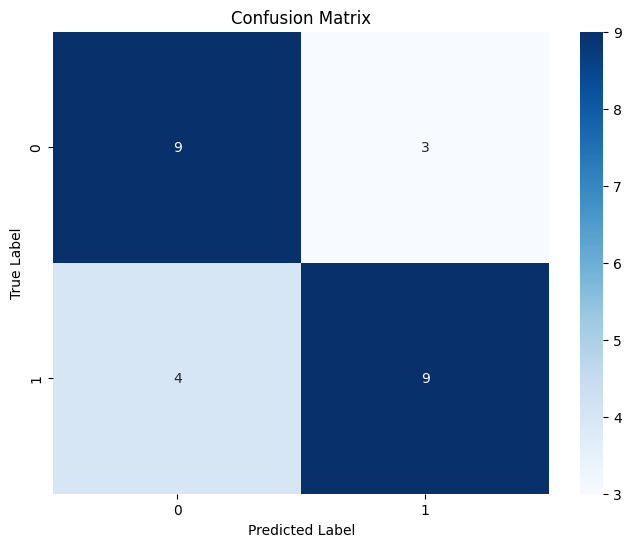

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from your model
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels for better visualization
class_labels = np.unique(np.concatenate([y_test, y_pred]))

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#PREDICTING THE ACCURACY

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.72
